In [6]:
# DOTA的path
DOTA_path = "/media/b622/MainDrive/Dataset/DOTA"

# DOTA数据集文件夹组织
- DOTA
    - val
        - labelTxt
        - images
    
    - train
        - labelTxt
        - images
    
    - test
        - images
        
每个文件夹下都是压缩包，需要进行解压。
        

In [7]:
""" 全部15类别
wordname_15 = ['plane', 'baseball-diamond', 'bridge', 'ground-track-field', 'small-vehicle', 'large-vehicle', 'ship', 'tennis-court',
               'basketball-court', 'storage-tank',  'soccer-ball-field', 'roundabout', 'harbor', 'swimming-pool', 'helicopter']
"""               

" 全部15类别\nwordname_15 = ['plane', 'baseball-diamond', 'bridge', 'ground-track-field', 'small-vehicle', 'large-vehicle', 'ship', 'tennis-court',\n               'basketball-court', 'storage-tank',  'soccer-ball-field', 'roundabout', 'harbor', 'swimming-pool', 'helicopter']\n"

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pylab
import sys
sys.path.append('/home/raymond/project/DOTA_PyTorch/DOTA_devkit') # 保证DOTA_devkit可用的关键
from DOTA_devkit import dota_utils as util
from DOTA_devkit import DOTA
import torchvision.transforms as transforms
from PIL import Image
import cv2
# 调用时要DOTA.DOTA
# 路径最好使用绝对路径
# 测试路径：'/home/raymond/project/DOTA_PyTorch/DOTA_devkit/example'
# train路径：'/media/b622/MainDrive/Dataset/DOTA/train'
dataset = DOTA.DOTA('/media/raymond/MainDrive/Dataset/DOTA/train_test',parseMode='parse_dota_rec')
#dataset = DOTA.DOTA('/media/raymond/MainDrive/Dataset/DOTA/train',parseMode = 'parse_dota_rec')
# 路径可能是b622或者raymond，取决于开机时从*哪个账户*登入的MainDrive

 DOTA dataset has been successfully loaded 


In [9]:
# 加载包含指定类别目标的图片ID
imgids = dataset.getImgIds(catNms=['plane'])
print(imgids)

'''
for i in range(len(imgids)):
    img = dataset.loadImgs(imgids[i])[0]
    img = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    img = img.convert("RGB")
    img = transforms.Resize((300,300))(img)
    img1 = transforms.ToTensor()(img)
    print (img1.size())
'''

imgid = imgids[0]
img = dataset.loadImgs(imgid)[0]
# 调试
img1 = transforms.ToTensor()(img)
print((img1.shape))

加载图片ID完成：共有 1 张图片符合筛选条件
['P0000']
torch.Size([3, 5502, 3875])


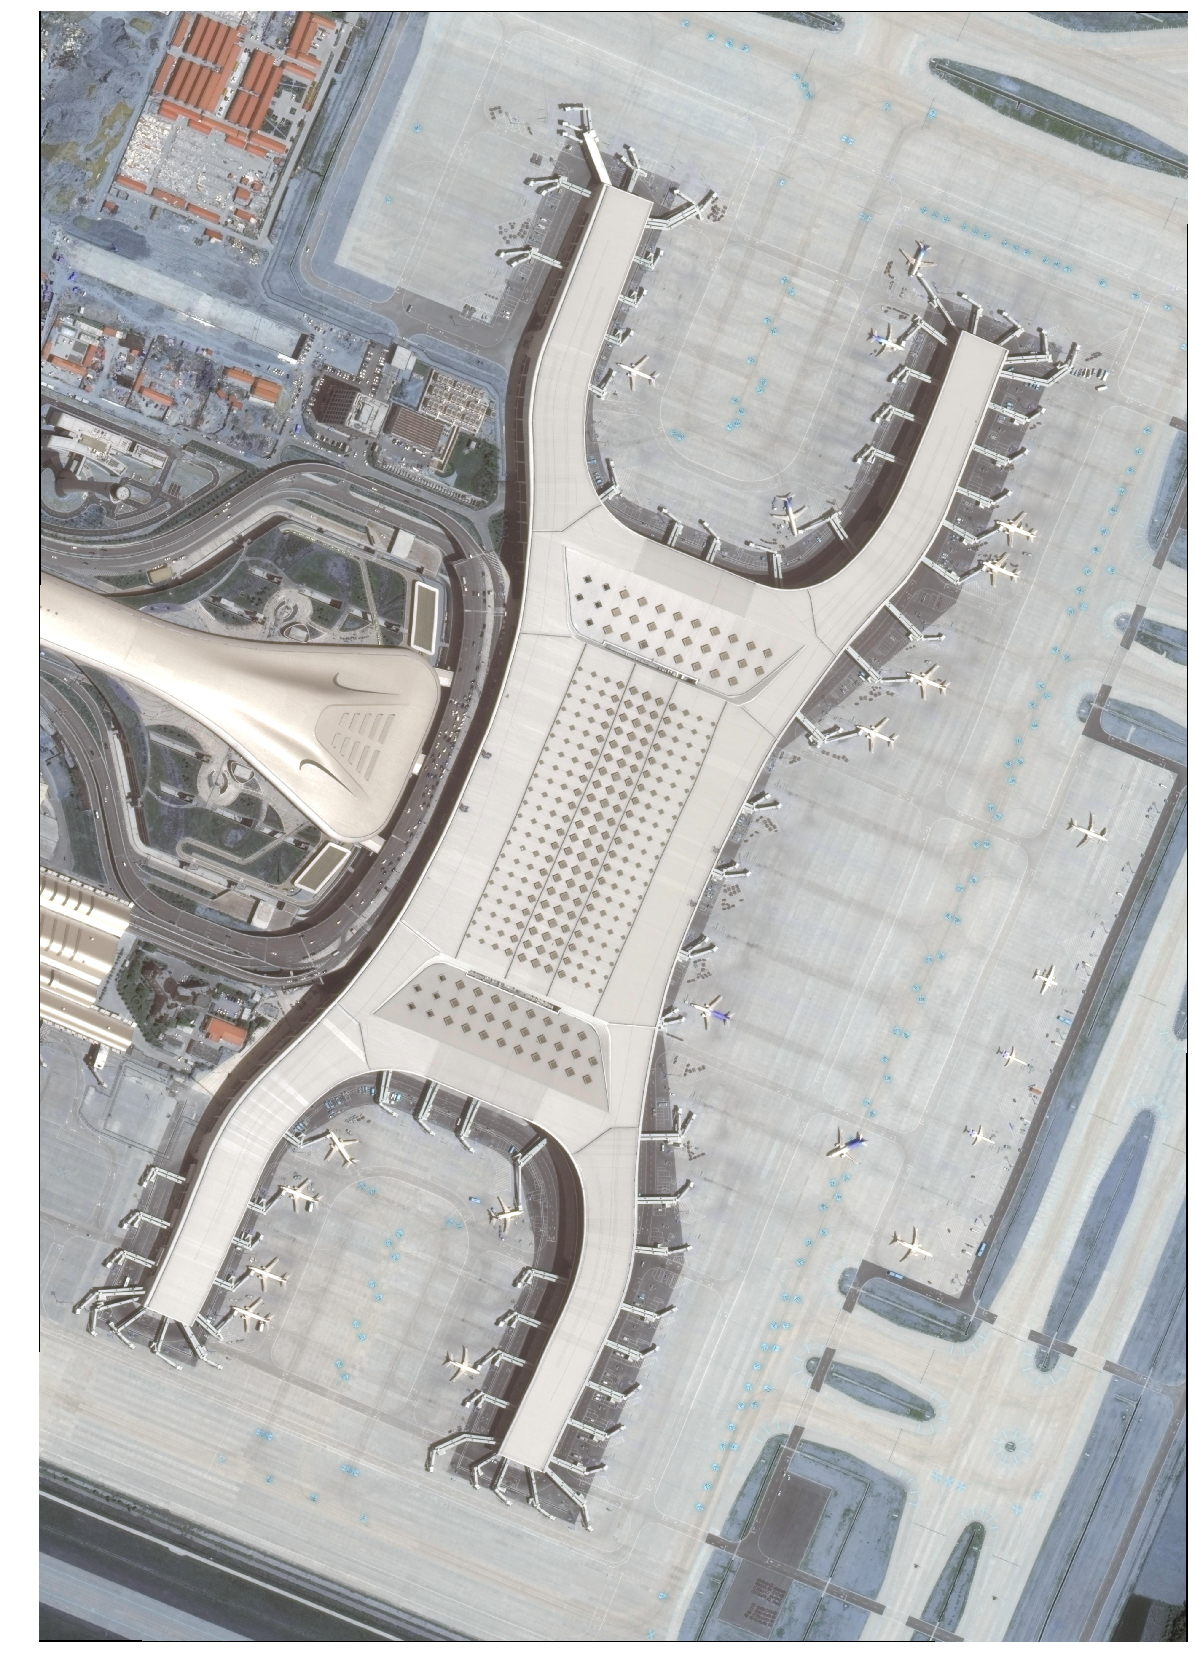

In [10]:
pylab.rcParams['figure.figsize'] = (30.0, 30.0) # 调整显示图像大小
plt.axis('off')
plt.imshow(img)
plt.show()

[{'name': 'plane', 'difficult': '0', 'poly': [(2753.0, 2408.0), (2861.0, 2385.0), (2888.0, 2468.0), (2805.0, 2502.0)], 'area': 9577.5, 'bndbox': (2753.0, 2385.0, 2888.0, 2502.0)}, {'name': 'large-vehicle', 'difficult': '0', 'poly': [(3445.0, 3391.0), (3484.0, 3409.0), (3478.0, 3422.0), (3437.0, 3402.0)], 'area': 613.0, 'bndbox': (3437.0, 3391.0, 3484.0, 3422.0)}, {'name': 'large-vehicle', 'difficult': '0', 'poly': [(3185.0, 4158.0), (3195.0, 4161.0), (3175.0, 4204.0), (3164.0, 4199.0)], 'area': 523.0, 'bndbox': (3164.0, 4158.0, 3195.0, 4204.0)}, {'name': 'large-vehicle', 'difficult': '0', 'poly': [(2870.0, 4250.0), (2916.0, 4268.0), (2912.0, 4283.0), (2866.0, 4263.0)], 'area': 720.0, 'bndbox': (2866.0, 4250.0, 2916.0, 4283.0)}, {'name': 'small-vehicle', 'difficult': '0', 'poly': [(630.0, 1674.0), (628.0, 1666.0), (640.0, 1654.0), (644.0, 1666.0)], 'area': 160.0, 'bndbox': (628.0, 1654.0, 644.0, 1674.0)}, {'name': 'small-vehicle', 'difficult': '0', 'poly': [(636.0, 1713.0), (633.0, 1706

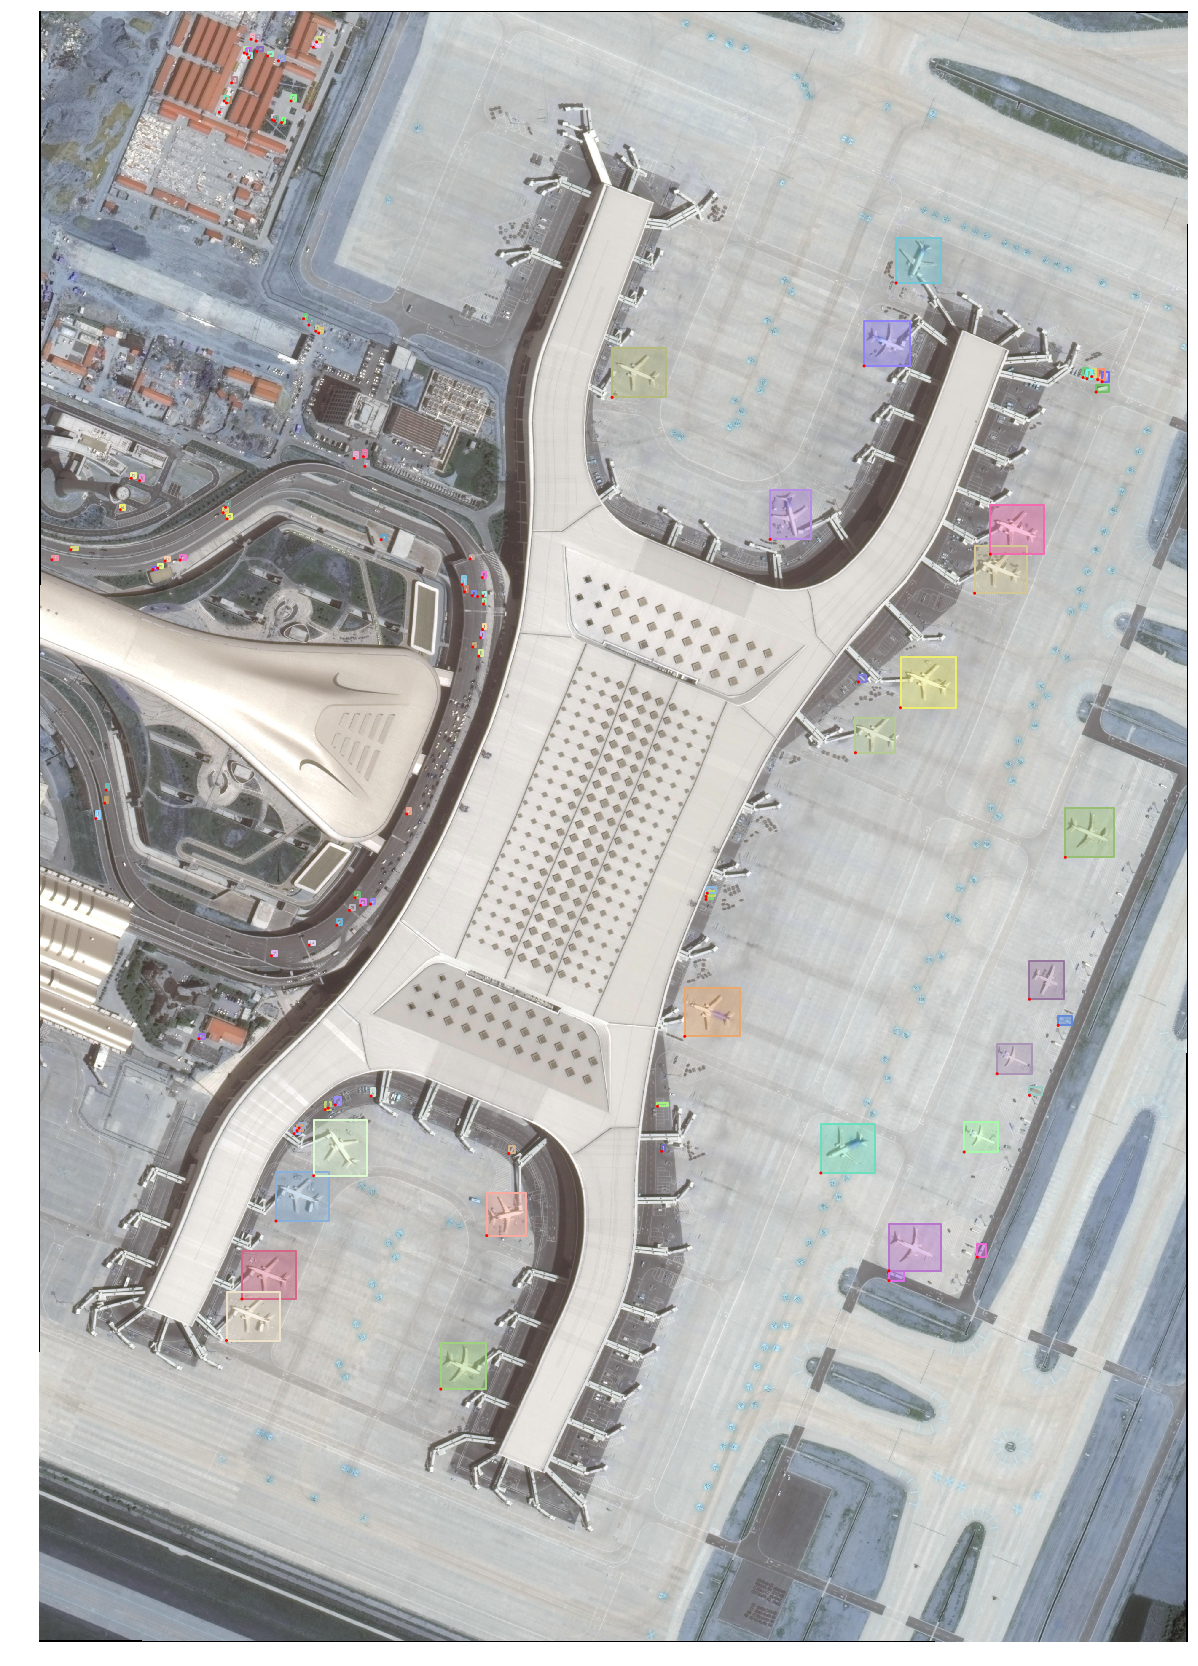

In [11]:
anns = dataset.loadAnns(imgId=imgid)
print((anns))
dataset.showAnns(anns,imgid,2)

In [5]:
# split image
# cut image (original)
from DOTA_devkit.ImgSplit import splitbase
split = splitbase(r'/media/raymond/MainDrive/Dataset/DOTA/train_test',r'/media/raymond/MainDrive/Dataset/DOTA/splittest',subsize = 600, choosebestpoint=True)
split.splitdata(1)

In [6]:
basepath = '/media/b622/MainDrive/Dataset/DOTA/train'
labelpath = os.path.join(basepath, 'labelTxt')
imgpaths = util.GetFileFromThisRootDir(labelpath)
imgpaths
a = os.path.basename(os.path.splitext(imgpaths[0])[0])
print(a)
imgpaths[0].split('/')[-1].split('.')[-1]

IndexError: list index out of range

In [ ]:
import math
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon, Circle

a = [1906, 1446, 1903, 1454, 1876, 1444, 1879, 1436]
print(a)
bbox = np.array(a,dtype=np.float32)
bbox = np.reshape(bbox,newshape=(2,4),order='F')
angle = math.atan2(-(bbox[0,1]-bbox[0,0]),bbox[1,1]-bbox[1,0])

print(bbox[0,1])
print(angle)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
# 输入（cx,cy,w,h）画图
def rec2xy(rec):
    cx,cy,w,h = rec[0],rec[1],rec[2],rec[3]
    x = [cx-w/2,cx-w/2,cx+w/2,cx+w/2]
    y = [cy-h/2,cy+h/2,cy-h/2,cy+h/2]
    return x,y

#输入[cx, cy, w, h, theta]
#输出[[x1, x2, x3, x4],[y1, y2, y3, y4]]
def Rotationrec2xy(rec):
    cx,cy,w,h,theta = rec[0],rec[1],rec[2],rec[3],rec[4]
    RMatrix = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]], dtype=np.float32)
    x_temp, y_temp = rec2xy([rec[0],rec[1],rec[2],rec[3]])
    box = np.array([x_temp,y_temp], dtype=np.float32)
    new_box = np.matmul(RMatrix,box-np.array([[cx],[cy]])) + np.array([[cx],[cy]])
    print(new_box)
    new_box = np.transpose(new_box)
    print(new_box)
    new_box = np.around(new_box)
    print(new_box)
    new_box[[2,3],:] = new_box[[3,2],:]
    print(new_box)
    return new_box.tolist()

x3,y3 = rec2xy([7,6,4,8])
a = Rotationrec2xy([7,6,4,8,math.pi/3])

print(a)
x1 = [1, 2, 3, 4]
y1 = [1, 2, 3, 4]     #第一组数据

x2 = [1, 2, 3, 4]
y2 = [2, 3, 4, 5]    #第二组数据
x4 = a[0]
y4 = a[1]
plt.scatter(a, marker = 'x',color = 'red', s = 40 ,label = 'First')
#                   记号形状       颜色           点的大小    设置标签
plt.scatter(x4,y4,marker='o',color = 'blue',s=40)
plt.xlim((0, 20))
plt.ylim((0, 20))
plt.show()

In [ ]:
a = [23,4,5,5,6,7,7,8,8,9]
a.pop()
a

In [ ]:
math.cos(math.pi/3)

In [ ]:
import numpy as np
a = np.array([[1,2,3,4],[5,6,7,8]])
b = np.transpose(a)
b.tolist()

In [ ]:
a = [1,2,3,4,1,5,2,1]
for i in range(len(a)):
    print(a[i])

In [ ]:
a = 'COCO_train2014_000000000009.txt'
print(a)
print(a.rstrip())

In [ ]:
import numpy as np
label_path = '/home/raymond/project/DOTA_PyTorch/COCO_train2014_000000000009.txt'
DOTA_path = '/media/raymond/MainDrive/Dataset/DOTA/train_test/labelTxt/P0000.txt'
label = np.loadtxt(DOTA_path).reshape(-1,5)
print ( label)

In [ ]:
import torch
import cv2
import numpy as np
import os
import torch.utils.data as data
import torchvision.transforms as transforms
from DOTA_devkit import dota_utils as util
from DOTA_devkit import DOTA

class DOTADetection(data.dataset):
    def __init__(self, rootPath, catNms = [], parseMode = ''):
        self.rootPath = rootPath
        self.parseMode = parseMode
        self.imgPath = os.path.join(self.rootPath,

In [ ]:
import torch
import cv2
import numpy as np
import os
import sys
import torch.utils.data as data
sys.path.append('/home/raymond/project/DOTA_PyTorch/DOTA_devkit') # 保证DOTA_devkit可用的关键
import torchvision.transforms as transforms
from DOTA_devkit import dota_utils as util
from DOTA_devkit import DOTA
from PIL import Image

class DOTADetection(data.Dataset):
    def __init__(self, rootPath, parseMode = 'parse_dota_rec',catNms = []):
        self.rootPath = rootPath
        self.parseMode = parseMode
        self.catNms = catNms
        self.dataset = DOTA.DOTA(self.rootPath, parseMode = self.parseMode)
        self.imgIDs = self.dataset.getImgIds(self.catNms)
        self.classes = ['plane', 'baseball-diamond', 'bridge', 'ground-track-field', 'small-vehicle', 'large-vehicle', 'ship', 'tennis-court',
               'basketball-court', 'storage-tank',  'soccer-ball-field', 'roundabout', 'harbor', 'swimming-pool', 'helicopter']
        self.category = {}
        for snum, cat in enumerate(self.classes):
            self.category[cat] = snum
        if self.parseMode == 'parse_dota_rec':
            self.parsekw = 'bndbox'
        else:
            self.parsekw = 'poly'
            
        
    def __getitem__(self, index):
        imgid = self.imgIDs[index]
        img = self.dataset.loadImgs(imgid)[0]
        img = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        img = img.convert("RGB") # cv转PIL再转RGB，因为原图PNG带4个通道。
        img = transforms.Resize((300,300))(img)
        anns = self.dataset.loadAnns(imgId = imgid)
        # 将anns转化为label
        # anns是字典，将里面的坐标信息和类别信息提取出来，其他的不要
        labels = []
        """
        当parseMode==parse_dota_rec时，解析‘bndbox’。
        鉴于parse时提取的信息不同，加入一个parsekw的属性。（不一定用上）
        """
        '''
        if self.parseMode == 'parse_dota_rec':
            for num in range(len(anns)):
                labels.append(self.category[anns[num]['name']])
                labels.extend(list(anns[num]['bndbox']))
        '''
        if self.parseMode == 'parse_dota_rec':
            for num,ann in enumerate(anns):
                labels.append([])
                labels[num].extend(list(ann['bndbox']))
                labels[num].append(self.category[ann['name']])
        # labels = np.array(labels,dtype=np.float).reshape(-1,5)
        # 方法2：将ann直接作为labels；在train中解析labels
        # labels = anns
        # 解析Label
        # 解析label部分可以放在train文件中（比如封装tensor这部分）
        # 考虑：label放在list,np,tensor哪里？
        """
        for num in range(len(anns)):
            temp = self.category[anns[num]['name']].append(anns[num]['poly'])
            labels.append(temp)
        """
        img = transforms.ToTensor()(img) # img转tensor
        # labels = np.array(labels,dtype=np.float).reshape(-1,5)
        # labels = torch.from_numpy(labels)
        # labels = torch.Tensor(labels)
        sample = {'image' : img, 'label': self.UniteLabels(labels)}
        
        return sample
        
    def __len__(self):
        return len(self.imgIDs)
    
    # 将Labels统一为（max_objects,5）的尺寸，以封装进dataloader
    # 多出的labels被截断
    def UniteLabels(self,labels,max_objects=120):
        unilabels = np.zeros((max_objects,5),np.float32)
        unilabels[range(len(labels))[:max_objects]] = labels[:max_objects]
        return torch.from_numpy(unilabels)
        
    
    
# use for testing the dataloader and dataset
if __name__ == "__main__":
    # pass
    dotaset = DOTADetection('/media/raymond/MainDrive/Dataset/DOTA/train_test')
    dota_dataloader = data.DataLoader(dotaset, batch_size=4,shuffle=False,num_workers=2,pin_memory=True)
    
    #i, sample in enumerate(dota_dataloader):
    dataiter = data.dataloader.DataLoaderIter(dota_dataloader)
    print((next(dataiter)['label']))